## Ejercicio 1

Sigue los siguientes pasos:

1. Lee las 10 primeras secuencias del archivo `ls_orchid.fasta` (obtenido en la sección 2.4 del lab 05) y almacénalas en una lista en la variable `seqs`. El siguiente print te ayudará a saber si tu código es correcto.

       > print len(seqs), type(seqs), type(seqs[0])
       10 <type 'list'> <class 'Bio.SeqRecord.SeqRecord'>

- Escribe el contenido de la variable `seqs` en formato FASTA en un fichero llamado `data/myseqs.fasta`. Usa `help(SeqIO.write)` para ver cómo se usa la función para escribir archivos FASTA.



In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Phylo, AlignIO, SeqIO
%matplotlib inline


seqs = [i for i in SeqIO.parse("data/ls_orchid.fasta", "fasta")][:10]
print len(seqs), type(seqs), type(seqs[0])

10 <type 'list'> <class 'Bio.SeqRecord.SeqRecord'>


In [92]:
help(SeqIO.write)

Help on function write in module Bio.SeqIO:

write(sequences, handle, format)
    Write complete set of sequences to a file.
    
        - sequences - A list (or iterator) of SeqRecord objects, or (if using
          Biopython 1.54 or later) a single SeqRecord.
        - handle    - File handle object to write to, or filename as string
          (note older versions of Biopython only took a handle).
        - format    - lower case string describing the file format to write.
    
    You should close the handle after calling this function.
    
    Returns the number of records written (as an integer).



In [93]:
SeqIO.write(seqs, "data/myseqs.fasta", "fasta")

10

In [94]:
!head data/myseqs.fasta

>gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAA
CGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGT
GACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCC
CGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCC
CAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAA
CGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTG
AATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCA
GGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCG
GCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCG


## Ejercicio 2

Sigue los siguientes pasos:

1. Llama a CLUSTALW2 con la entrada el fichero `data/myseqs.fasta` y salida `data/myseqs-clustal.phy`, con formato de salida `PHYLIP`

2. Dibuja el albol filogenético del alineamiento obtenido (con `Phylo.draw_graphviz`)


In [95]:
!clustalw2 -INFILE=data/myseqs.fasta -OUTFILE=data/myseqs-clustal.phy -OUTPUT=PHYLIP




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: gi|2765658|emb|Z78533.1|CIZ78533   740 bp
Sequence 2: gi|2765657|emb|Z78532.1|CCZ78532   753 bp
Sequence 3: gi|2765656|emb|Z78531.1|CFZ78531   748 bp
Sequence 4: gi|2765655|emb|Z78530.1|CMZ78530   744 bp
Sequence 5: gi|2765654|emb|Z78529.1|CLZ78529   733 bp
Sequence 6: gi|2765652|emb|Z78527.1|CYZ78527   718 bp
Sequence 7: gi|2765651|emb|Z78526.1|CGZ78526   730 bp
Sequence 8: gi|2765650|emb|Z78525.1|CAZ78525   704 bp
Sequence 9: gi|2765649|emb|Z78524.1|CFZ78524   740 bp
Sequence 10: gi|2765648|emb|Z78523.1|CHZ78523   709 bp
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  81
Sequences (1:3) Aligned. Score:  82
Sequences (1:4) Aligned. Score:  78
Sequences (1:5) Aligned. Score:  76
Sequences (1:6) Aligned. Score:  82
Sequences (1:7) Aligned. Score:  83
Sequences (1:8) Aligned. Score:  79
Sequences (1:9) Aligned. Score:  79
Sequences (1:10) Aligned. Score:  78
Sequences (2:3) Al

In [96]:
tree = Phylo.read('data/myseqs.dnd', 'newick')

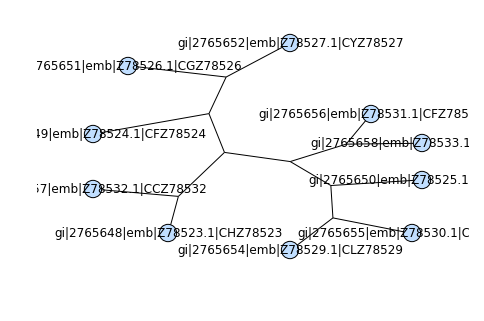

In [97]:
Phylo.draw_graphviz(tree)

## Ejercicio 3

Este ejercicio es en `R`:
    
1. Lee el fichero `data/myseqs.fasta` creado anteriormente en la variable `myseqs` de R

2. Crea un dotplot de las secuencias primera y tercera. (Puedes ver [aquí](https://a-little-book-of-r-for-bioinformatics.readthedocs.org/en/latest/src/chapter4.html) cómo se hace)

In [98]:
%%R
myseqs <- read.fasta(file = "data/myseqs.fasta")
length(myseqs)

[1] 10


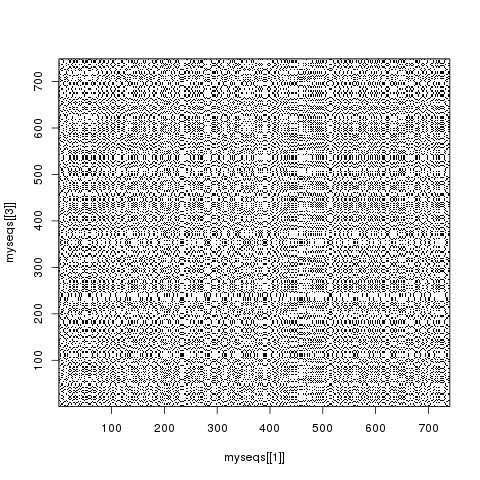

In [99]:
%%R
dotPlot(myseqs[[1]], myseqs[[3]])

## Ejercicio 4

Realiza el mismo alineamiento anterior pero con **MUSCLE** y compara el resultado obtenido por **CLUSTALW2**  de la secuencia con GI `2765655` imprimiendo ambos alineamientos de forma análoga a lo mostrado en las Notas.

In [101]:
 !muscle -in data/myseqs.fasta -phyiout data/myseqs-muscle.phy 


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

myseqs 10 seqs, max length 753, avg  length 731
00:00:00     10 MB(1%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     10 MB(1%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00     17 MB(2%)  Iter   1  100.00%  Align node
00:00:00     17 MB(2%)  Iter   1  100.00%  Root alignment
00:00:00     17 MB(2%)  Iter   2  100.00%  Refine tree
00:00:00     17 MB(2%)  Iter   2  100.00%  Root alignment
00:00:00     17 MB(2%)  Iter   2  100.00%  Root alignment
00:00:00     17 MB(2%)  Iter   3  100.00%  Refine biparts
00:00:00     17 MB(2%)  Iter   4  100.00%  Refine biparts


In [102]:
align_m = AlignIO.read(open("data/myseqs-muscle.phy", "rU"), "phylip")
align_c = AlignIO.read(open("data/myseqs-clustal.phy", "rU"), "phylip")

for rm in align_m:
    if rm.id=="gi|2765655":
        print "m: ", rm.seq

for rm in align_c:
    if rm.id=="gi|2765655":
        print "c: ", rm.seq


m:  CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACATAATAAACGATTGAGTGAATCTGGAGGACTTGTGGTAATTTGGCTCGCTA-GGGATATCCTTTTGTGGTGACCATGATTTGTCATTGGGCCTCATTGAGAGCTTTCATGGCGGGTTTGAACCTCTAGCACGGTCCAGTTT--GCACCAAGGTATATA-AAGAATCACCGATGAATGACATTATTGCCCC-ACACAACGTCGGAGGTGTGGTGTGTTAATG--TTCATTC-CAATGAA--TTTTGATGACTCTCGGCAGACGGATATCTTGACTC-TTGCAT-CGATGAA-GAACGCACCGAAATGTGATAAGTGGTGTGAATTGCAGAATCCCGTGAACCATCGAGTC-TTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCCTGGGCGTCGTATGTTTTATCTCTCCTTCCAATGCTTGTCCAGCATATAGCTAGGCCATCATTGTGTGGATGTGAAAGATTGGCCCCTTGTGCTTAGGTGCGGTGGGTCTAAGGATATGTGTTTTGATGGTCTGAAACTTGGCAAGAGGTGGA-GGATGCTGGCAGCCGCAAGGCTATTGTTTGAATCCCCCATGTTGTCATG-TTTGTTGGGCCTATAGAACAACTTGTTTGGA-CCCTAATTAA-GGCAAAACAATCCTTGGGTGGTTGATTTCCAATCAGA-TGCGACCCCA-GTCAGG--GGGCCACCCCAT----------
c:  CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACATAATAAACGATTGAGTGAATCTGGAGGACTTGTGGTAATTTGGCTCGCT-AGGGATATCCTTTTGTGGTGACCATGATTTGTCATTGGGCCTCATTGAGAGCTTTCATGGCGGGTTTGAACCTCTAGCACGGTCCAGTTT--GCACCAAGGTATATAAA-GA


## Ejercicio 5

Ejecuta de nuevo **clustalw2**  y obtén la media de los _scores_ de las secuencias alineadas. Es decir, de los mensajes tipo:

    Sequences (6:10) Aligned. Score:  80
    
La media debería de darte 82.56
    
Para ello usa el magic

    %%script bash --out out --err err

Con la siguiente instrucción tienes una lista en Python con las líneas de la salida:

    lines = out.split("\n")

y, dada una línea, con la siguiente instrucción obtienes las _palabras_ de la línea:

    tokens = line.split()

por ejemplo, si una línea tiene el siguiente contenido:

    Sequences (6:10) Aligned. Score:  80
    
la variable `tokens` tendría:

    ["Sequences", "(6:10)", "Aligned.", "Score:",  "80"]



In [103]:
%%script bash --out out --err err
clustalw2 -INFILE=data/myseqs.fasta -OUTFILE=data/myseqs-clustal.phy -OUTPUT=PHYLIP

In [104]:
scores = []
for line in out.split("\n"):
    t = line.split()
    if len(t)>4 and t[0]=="Sequences":
        scores.append(int(t[4]))
print np.mean(scores)


82.5555555556
